#Results
Author: John Pura                                               
Email: <john.pura@duke.edu> 

##1. Benchmarking Python and R Implementation of `fastclime`

In [21]:
import timeit
import numpy as np
import pandas as pd
import fastclime as fc
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
flare = importr('flare')
fastclime = importr('fastclime')

dlist = [50, 100, 200, 400, 800]

Pytimes = []
Rtimes = []

for i in range(len(dlist)):
    L = flare.sugm_generator(n = 200, d = dlist[i],seed=1234)
    x = np.array(L.rx2('data'))

    def f_timePy():
        fc.fastclime_R(x)
        
    def f_timeR():
        fastclime.fastclime(L.rx2('data'))

    tPy = timeit.Timer("f_timePy()", setup="from __main__ import f_timePy")
    Pytimes.extend(tPy.repeat(1, 1))
    
    tR = timeit.Timer("f_timeR()", setup="from __main__ import f_timeR")
    Rtimes.extend(tR.repeat(1, 1))    

Pytimes = [round(i,2) for i in Pytimes]
Rtimes = [round(i,2) for i in Rtimes]
dlist2 = [format(i,'.0f') for i in dlist]
df = pd.DataFrame([dlist2,Pytimes,Rtimes])
df.index = ['p','Python','R']
df.to_csv("benchmark.csv",header=False,index=True)

Generating data from the multivariate normal distribution with the random graph structure...
done.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Generating data from the multivariate normal distribution with the random graph structure...
done.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Generating data from the multivariate normal distribution with the random graph structure...
done.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Generating data from the multivariate normal distribution with the random graph structure...
done.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Generating data from the multivariate normal distribution with the random graph structure...
done.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 


##2. Numerical simulations with `fastclime` and `TIGER`

###2.1 Benchmark performance

In [22]:
import timeit
import numpy as np
import pandas as pd
import fastclime as fc
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
flare = importr('flare')
fastclime = importr('fastclime')

dlist = [100, 200, 300, 400]

Pytimes = []
Rtimes = []

for i in range(len(dlist)):
    L = flare.sugm_generator(n = 100, d = dlist[i],seed=1234)
    x = np.array(L.rx2('data'))

    def f_timePy():
        fc.fastclime_R(x)
        
    def f_timeR():
        flare.sugm(L.rx2('data'),method="tiger",prec=1e-5,standardize=True)

    tPy = timeit.Timer("f_timePy()", setup="from __main__ import f_timePy")
    Pytimes.extend(tPy.repeat(1, 1))
    
    tR = timeit.Timer("f_timeR()", setup="from __main__ import f_timeR")
    Rtimes.extend(tR.repeat(1, 1))    

Pytimes = [round(i,2) for i in Pytimes]
Rtimes = [round(i,2) for i in Rtimes]
dlist2 = [format(i,'.0f') for i in dlist]
df = pd.DataFrame([dlist2,Pytimes,Rtimes])
df.index = ['p','fastclime','TIGER']
df.to_csv("tigerfc.csv",header=False,index=True)

Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.


####2.2 Graphical comparison of `fastclime` and `TIGER`

Generating data from the multivariate normal distribution with the band graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.


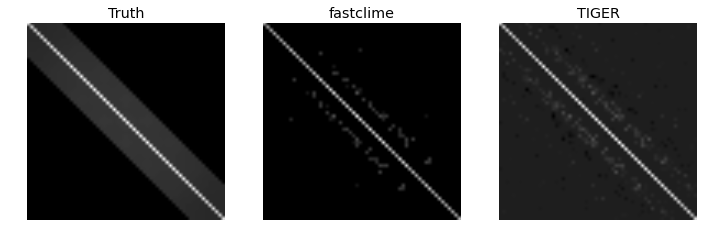

In [3]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

import fastclime as fc
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import matplotlib.cm as cm

fastclime = importr('fastclime')
flare = importr('flare')
grdevices = importr('grDevices')
base = importr('base')
stats = importr('stats')

L = flare.sugm_generator(n = 200, d = 60,graph="band",g=10,seed=1234)
x = np.array(L.rx2('data'))
fcout = fc.fastclime_R(x)
fc_res = fc.fastclime_select(x,fcout.lambdamtx,fcout.icovlist)
flareout = flare.sugm(L.rx2('data'),np.sqrt(np.log(60)/200),method="tiger",prec=1e-5,standardize=True)


fig = plt.figure(figsize=(12,6))
fig.add_subplot(131)
plt.imshow(np.array(L.rx2('omega')),cmap = cm.Greys_r)
plt.title('Truth')
plt.axis('off')
fig.add_subplot(132)
plt.imshow(fc_res.opt_icov,cmap = cm.Greys_r)
plt.title('fastclime')
plt.axis('off')
fig.add_subplot(133)
plt.imshow(np.array(flareout.rx2('icov')[0]),cmap = cm.Greys_r)
plt.title('TIGER')
plt.axis('off')

plt.savefig('banded.png')
#plt.show()



Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.


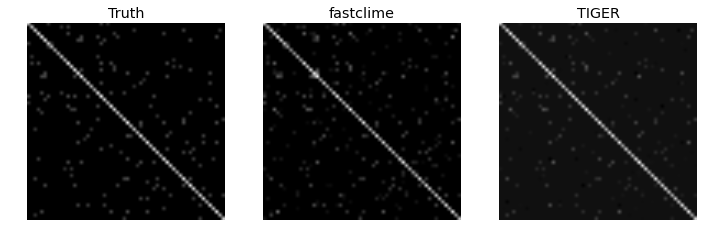

In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

import fastclime as fc
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import matplotlib.cm as cm

fastclime = importr('fastclime')
flare = importr('flare')
grdevices = importr('grDevices')
base = importr('base')
stats = importr('stats')

L = flare.sugm_generator(n = 200, d = 60,graph="random",seed=1234)
x = np.array(L.rx2('data'))
fcout = fc.fastclime_R(x)
fc_res = fc.fastclime_select(x,fcout.lambdamtx,fcout.icovlist)
flareout = flare.sugm(L.rx2('data'),np.sqrt(np.log(60)/200),method="tiger",prec=1e-5,standardize=True)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(131)
plt.imshow(np.array(L.rx2('omega')),cmap = cm.Greys_r)
plt.title('Truth')
plt.axis('off')
fig.add_subplot(132)
plt.imshow(fc_res.opt_icov,cmap = cm.Greys_r)
plt.title('fastclime')
plt.axis('off')
fig.add_subplot(133)
plt.imshow(np.array(flareout.rx2('icov')[0]),cmap = cm.Greys_r)
plt.title('TIGER')
plt.axis('off')

plt.savefig('random.png')


####2.3 Accuracy of results with respect to ground truth

In [17]:
import numpy as np
import pandas as pd
import fastclime as fc
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
flare = importr('flare')
fastclime = importr('fastclime')

dlist = [100, 200, 300, 400]

flare_err = np.empty((4,3))
fc_err = np.empty((4,3))

for i in range(len(dlist)):
    L = flare.sugm_generator(n = 100, d = dlist[i],graph="random",seed=1234)
    x = np.array(L.rx2('data'))
    omega = np.array(L.rx2('omega'))
    fcout = fc.fastclime_R(x)
    flareout = flare.sugm(L.rx2('data'),np.sqrt(np.log(dlist[i])/100),method="tiger",prec=1e-5,standardize=True)
    fcres = fc.fastclime_select(x,fcout.lambdamtx,fcout.icovlist)
    
    #Norms
    flare_err[i,0] = np.linalg.norm(omega-np.array(flareout.rx2('icov')[0]),'fro')
    fc_err[i,0] = np.linalg.norm(omega-fcres.opt_icov,'fro')
    
    flare_err[i,1] = np.linalg.norm(omega-np.array(flareout.rx2('icov')[0]),np.inf)
    fc_err[i,1] = np.linalg.norm(omega-fcres.opt_icov,np.inf)
    
    flare_err[i,2] = np.linalg.norm(omega-np.array(flareout.rx2('icov')[0]),2)
    fc_err[i,2] = np.linalg.norm(omega-fcres.opt_icov,2)    
    
fle = np.around(np.ndarray.flatten(flare_err.reshape((12,1))),decimals=2)
fce = np.around(np.ndarray.flatten(fc_err.reshape((12,1))),decimals=2)
    
d = np.array([100,200,300,400])
d2 = np.repeat(d,3)

normlist = ['Frobenius','Infinity','L2',
            'Frobenius','Infinity','L2',
            'Frobenius','Infinity','L2',
            'Frobenius','Infinity','L2']

df = pd.DataFrame([list(d2),normlist,list(fce),list(fle)]).T
df.columns = ['p','Norm','fastclime','TIGER']
df.to_csv("normerrors.csv")


Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
Generating data from the multivariate normal distribution with the random graph structure...
done.
High-deimensional Sparse Undirected Graphical Models.
Tuning-Insensitive Graph Estimation and Regression.
